In [1]:
# !pip install pandas
# !pip install numpy
# !pip install seaborn
# !pip install matplotlib
# !pip install xgboost
# !pip install lightgbm
# !pip install sklearn
# !pip install --upgrade scikit-learn

# 라이브러리 임포트
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import xgboost
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, RidgeCV, RidgeClassifier
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV

import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# from google.colab import drive
# drive.mount('/content/drive')

# EDA

## 변수 설명
  - **int_rate** : 대출자에 부여된 이자율 (Interest rate of the loan the applicant received)
  - **annual_inc** : 연 소득 (annual income)
  - **dti** : 소득 대비 부채 비율 (Debt-to-income ratio)
  - **delinq_2yrs** : 지난 2년 간 체납 발생 횟수 (Delinquencies on lines of credit in the last 2 years)
  - **inq_last_6mths** : 지난 6개월 간 신용 조회 수 (Inquiries into the applicant's credit during the last 6 months)
  - **pub_rec** : 파산 횟수 (Number of bankruptcies listed in the public record)
  - **revol_bal** : 리볼빙 잔액 (Total credit revolving balance)
  - **total_acc** : 지금까지 소유했던 신용카드 개수 (num_total_cc_accounts : Total number of credit card accounts in the applicant's history)
  - **collections_12_mths_ex_med** : 의료부문을 제외한 지난 12개월 간 추심 발생 횟수 (num_collections_last_12m : Number of collections in the last 12 months. This excludes medical collections)
  - **acc_now_delinq** : 대출자가 체납 상태에 있지 않은 계좌의 수 (The number of accounts on which the borrower is now delinquent)
  - **tot_coll_amt** : 대출자에 대한 현재까지의 총 추심액 (total_collection_amount_ever : The total amount that the applicant has had against them in collections)
  - **tot_cur_bal** : 전 계좌의 현재 통합 잔고 (Total current balance of all accounts)
  - **chargeoff_within_12_mths** : 대출 부 신청인의 대출 신청 직전 12개월 간 세금 공제 횟수 (Number of charge-offs within last 12 months at time of application for the secondary applicant)
  - **delinq_amnt** : 체납 금액 (delinquency amount)
  - **tax_liens** : 세금 저당권의 수 (Number of tax liens)
  - **emp_length1 ~ 12** : 고용 연수 (Number of years in the job)
  - **home_ownership1 ~ 6** : 대출 신청자의 주거 소유 형태 (The ownership status of the applicant's residence)
  - **verification_status1 ~ 3** : 공동 소득 발생 여부 및 형태 (verification_income_joint : Type of verification of the joint income)
  - **purpose1 ~ 14** : 대출 목적 (The purpose of the loan)
  - **initial_list_status1 ~ 2** : 최초 대출 상태 (Initial listing status of the loan)
  - **mths_since_last_delinq1 ~ 11** : 마지막 체납이 지금으로부터 몇개월 전에 있었는지를 나타내는 변수 (Months since the last delinquency)
  
  - **funded_amnt** : 대출액 (Funded amount)
  - **funded_amnt_inv** : 사채 대출액 (Funded amount by investors)
  - **total_rec_late_fee** : 총 연체료 중 납부액 (Late fees received to date)
  - **term1** : 상환 기간 (The number of payments on the loan. Values are in months and can be either 36 or 60)
  - **open_acc** : 개설 개좌 수 (The number of open credit lines in the borrower's credit file)
  - **installment** : 대출 발생 시 월 상환액 (The monthly payment owed by the borrower if the loan originates)
  - **revol_util** : 리볼빙 한도 대비 리볼빙 사용 비율 (Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit)
  - **out_prncp** : 대출액 중 원리금 잔액 (Remaining outstanding principal for total amount funded)
  - **out_prncp_inv** : 사채 대출액 중 원리금 잔액 (Remaining outstanding principal for total amount funded by investors)
  - **total_rec_int** : 이자 상환액 (Interest received to date)
  - **fico_range_low** : FICO(일종의 신용점수) 최저값 (The lower boundary range the borrower’s FICO at loan origination belongs to)
  - **fico_range_high** : FICO(일종의 신용점수) 최고값 (The upper boundary range the borrower’s FICO at loan origination belongs to)
  
  - **depvar** : 고객의 부도 여부 (dependent variable)

In [2]:
# base_path = '/content/drive/MyDrive/이어드림 머신러닝/22 01 25/'
# df = pd.read_csv(base_path + 'train.csv')
# df.head()

df = pd.read_csv('train.csv')
df.head()

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,...,term1,open_acc,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,fico_range_low,fico_range_high,depvar
0,0.0824,21000.0,29.19,0,1,0,3016,26,0,0,...,1,18,37.74,0.076,0.0,0.0,157.94,765,769,0
1,0.1299,80000.0,4.82,0,1,1,5722,24,0,0,...,1,8,269.52,0.447,0.0,0.0,1702.42,665,669,0
2,0.1299,38000.0,23.66,0,3,0,6511,18,0,0,...,1,7,168.45,0.880,0.0,0.0,1066.64,670,674,0
3,0.1367,100000.0,16.27,4,2,0,6849,30,0,0,...,1,12,510.27,0.457,0.0,0.0,1256.24,680,684,1
4,0.1269,30000.0,25.28,0,1,2,8197,12,0,0,...,1,8,335.45,0.416,0.0,0.0,871.04,660,664,1


In [3]:
df.tail()

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,...,term1,open_acc,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,fico_range_low,fico_range_high,depvar
99995,0.1757,65000.0,17.67,0,3,1,11255,21,1,0,...,1,13,718.75,0.780,0.0,0.0,5373.29,660,664,1
99996,0.0890,65000.0,2.88,0,0,0,2105,12,0,0,...,1,7,190.52,0.120,0.0,0.0,835.66,765,769,0
99997,0.1349,46000.0,32.12,0,1,0,8998,20,0,0,...,1,19,217.16,0.643,0.0,0.0,1261.67,665,669,0
99998,0.2115,31000.0,4.53,0,1,0,3875,4,0,0,...,1,3,207.64,0.731,0.0,0.0,1357.69,710,714,1
99999,0.1599,125000.0,33.33,0,0,0,34580,30,0,0,...,1,19,1164.42,0.499,0.0,0.0,8882.58,690,694,0


# train data EDA


In [4]:
df[['out_prncp', 'out_prncp_inv']].sum()

out_prncp        25332.73
out_prncp_inv    25325.94
dtype: float64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 76 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   int_rate                    100000 non-null  float64
 1   annual_inc                  100000 non-null  float64
 2   dti                         100000 non-null  float64
 3   delinq_2yrs                 100000 non-null  int64  
 4   inq_last_6mths              100000 non-null  int64  
 5   pub_rec                     100000 non-null  int64  
 6   revol_bal                   100000 non-null  int64  
 7   total_acc                   100000 non-null  int64  
 8   collections_12_mths_ex_med  100000 non-null  int64  
 9   acc_now_delinq              100000 non-null  int64  
 10  tot_coll_amt                100000 non-null  int64  
 11  tot_cur_bal                 100000 non-null  int64  
 12  chargeoff_within_12_mths    100000 non-null  int64  
 13  delinq_amnt    

In [6]:
df['emp_length'] = 0

for i in range(12):
    j = 0
    while j < 100000:
        if df['emp_length{}'.format(i+1)][j] == 1:
            df['emp_length'][j] = i+1
            j += 1
        else:
            j += 1

df['emp_length']

0         1
1         2
2         4
3         3
4         4
         ..
99995     7
99996    11
99997     4
99998    12
99999     5
Name: emp_length, Length: 100000, dtype: int64

In [7]:
for i in range(12):
    df = df.drop('emp_length{}'.format(i+1), axis = 1)
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 65 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   int_rate                    100000 non-null  float64
 1   annual_inc                  100000 non-null  float64
 2   dti                         100000 non-null  float64
 3   delinq_2yrs                 100000 non-null  int64  
 4   inq_last_6mths              100000 non-null  int64  
 5   pub_rec                     100000 non-null  int64  
 6   revol_bal                   100000 non-null  int64  
 7   total_acc                   100000 non-null  int64  
 8   collections_12_mths_ex_med  100000 non-null  int64  
 9   acc_now_delinq              100000 non-null  int64  
 10  tot_coll_amt                100000 non-null  int64  
 11  tot_cur_bal                 100000 non-null  int64  
 12  chargeoff_within_12_mths    100000 non-null  int64  
 13  delinq_amnt    

In [8]:
df['mths_since_last_delinq'] = 0

for i in range(11):
    j = 0
    while j < 100000:
        if df['mths_since_last_delinq{}'.format(i+1)][j] == 1:
            df['mths_since_last_delinq'][j] = i+1
            j += 1
        else:
            j += 1

df['mths_since_last_delinq']

0         1
1         1
2        11
3         5
4         1
         ..
99995     1
99996     1
99997     1
99998     1
99999     1
Name: mths_since_last_delinq, Length: 100000, dtype: int64

In [9]:
for i in range(11):
    df = df.drop('mths_since_last_delinq{}'.format(i+1), axis = 1)
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 55 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   int_rate                    100000 non-null  float64
 1   annual_inc                  100000 non-null  float64
 2   dti                         100000 non-null  float64
 3   delinq_2yrs                 100000 non-null  int64  
 4   inq_last_6mths              100000 non-null  int64  
 5   pub_rec                     100000 non-null  int64  
 6   revol_bal                   100000 non-null  int64  
 7   total_acc                   100000 non-null  int64  
 8   collections_12_mths_ex_med  100000 non-null  int64  
 9   acc_now_delinq              100000 non-null  int64  
 10  tot_coll_amt                100000 non-null  int64  
 11  tot_cur_bal                 100000 non-null  int64  
 12  chargeoff_within_12_mths    100000 non-null  int64  
 13  delinq_amnt    

In [10]:
df.describe()

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,...,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,fico_range_low,fico_range_high,depvar,emp_length,mths_since_last_delinq
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.130833,7.436061e+04,18.514508,0.343700,0.668880,0.235720,16090.202820,24.675910,0.018810,0.005800,...,434.077648,0.537233,0.253327,0.253259,2491.282802,692.630550,696.630660,0.325690,5.084010,3.774040
std,0.044773,7.467409e+04,8.413049,0.905007,0.952044,0.661468,21569.939271,11.883834,0.150321,0.083585,...,265.921746,0.239373,18.053290,18.051746,2706.262200,29.668017,29.668584,0.468634,3.569059,3.410721
min,0.053200,5.360000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,...,23.360000,0.000000,0.000000,0.000000,0.000000,660.000000,664.000000,0.000000,1.000000,1.000000
25%,0.097500,4.500000e+04,12.200000,0.000000,0.000000,0.000000,6009.000000,16.000000,0.000000,0.000000,...,240.292500,0.361000,0.000000,0.000000,857.292500,670.000000,674.000000,0.000000,2.000000,1.000000
50%,0.127400,6.200000e+04,18.060000,0.000000,0.000000,0.000000,11030.500000,23.000000,0.000000,0.000000,...,366.370000,0.541000,0.000000,0.000000,1615.160000,685.000000,689.000000,0.000000,4.000000,2.000000
75%,0.158000,9.000000e+04,24.530000,0.000000,1.000000,0.000000,19540.000000,31.000000,0.000000,0.000000,...,575.860000,0.720000,0.000000,0.000000,3039.115000,705.000000,709.000000,1.000000,8.000000,7.000000
max,0.309900,8.300000e+06,49.930000,20.000000,6.000000,63.000000,971736.000000,176.000000,5.000000,6.000000,...,1584.900000,8.923000,2330.970000,2330.970000,28005.960000,845.000000,850.000000,1.000000,12.000000,11.000000


In [11]:
df['depvar'].value_counts()

0    67431
1    32569
Name: depvar, dtype: int64

In [12]:
# 결측치 확인
pd.DataFrame(df.isnull().sum()).rename(columns={0:'Non-Null Count'}).T

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,...,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,fico_range_low,fico_range_high,depvar,emp_length,mths_since_last_delinq
Non-Null Count,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# 라벨(depvar) 비율 확인
print('y=1 ratio :', df.depvar.sum()/len(df))

y=1 ratio : 0.32569


In [14]:
df['purpose4'].head()

0    0
1    0
2    0
3    0
4    0
Name: purpose4, dtype: int64

In [15]:
df['purpose4'].value_counts()

0    100000
Name: purpose4, dtype: int64

In [16]:
df = df.drop('purpose4', axis = 1)
df.shape

(100000, 54)

In [17]:
# purpose7                   -0.009925
# total_acc                  -0.009060
# purpose1                   -0.005753
# purpose14                   0.000244
# home_ownership1             0.000296
# home_ownership4             0.001121
# home_ownership5             0.001478
# purpose11                   0.001532
# chargeoff_within_12_mths    0.001621
# home_ownership3             0.001837
# acc_now_delinq              0.003344
# delinq_amnt                 0.003723
# purpose9                    0.004740
# purpose13                   0.005027
# tot_coll_amt                0.005498
# purpose8                    0.006220
# purpose6                    0.006423
# tax_liens                   0.007452
# purpose10                   0.008429
drop_list = ['purpose7', 'total_acc', 'purpose1', 'purpose14', 'home_ownership1', 'home_ownership4', 'home_ownership5',
            'purpose11', 'chargeoff_within_12_mths', 'home_ownership3', 'acc_now_delinq', 'delinq_amnt', 'purpose9', 'purpose13',
            'tot_coll_amt', 'purpose8', 'purpose6', 'tax_liens', 'purpose10']

for d in drop_list:
    df = df.drop(d, axis = 1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 35 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   int_rate                    100000 non-null  float64
 1   annual_inc                  100000 non-null  float64
 2   dti                         100000 non-null  float64
 3   delinq_2yrs                 100000 non-null  int64  
 4   inq_last_6mths              100000 non-null  int64  
 5   pub_rec                     100000 non-null  int64  
 6   revol_bal                   100000 non-null  int64  
 7   collections_12_mths_ex_med  100000 non-null  int64  
 8   tot_cur_bal                 100000 non-null  int64  
 9   home_ownership2             100000 non-null  int64  
 10  home_ownership6             100000 non-null  int64  
 11  verification_status1        100000 non-null  int64  
 12  verification_status2        100000 non-null  int64  
 13  verification_st

# test data EDA

In [18]:
# df_test = pd.read_csv(base_path + 'test.csv')

df_test = pd.read_csv('test.csv')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35816 entries, 0 to 35815
Data columns (total 76 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   int_rate                    35816 non-null  float64
 1   annual_inc                  35816 non-null  float64
 2   dti                         35816 non-null  float64
 3   delinq_2yrs                 35816 non-null  int64  
 4   inq_last_6mths              35816 non-null  int64  
 5   pub_rec                     35816 non-null  int64  
 6   revol_bal                   35816 non-null  int64  
 7   total_acc                   35816 non-null  int64  
 8   collections_12_mths_ex_med  35816 non-null  int64  
 9   acc_now_delinq              35816 non-null  int64  
 10  tot_coll_amt                35816 non-null  int64  
 11  tot_cur_bal                 35816 non-null  int64  
 12  chargeoff_within_12_mths    35816 non-null  int64  
 13  delinq_amnt                 358

In [19]:
df_test['emp_length'] = 0

for i in range(12):
    j = 0
    while j < 35816:
        if df_test['emp_length{}'.format(i+1)][j] == 1:
            df_test['emp_length'][j] = i+1
            j += 1
        else:
            j += 1

df_test['emp_length']

0         7
1         2
2        11
3         2
4         2
         ..
35811     2
35812     1
35813     3
35814     3
35815     2
Name: emp_length, Length: 35816, dtype: int64

In [20]:
for i in range(12):
    df_test = df_test.drop('emp_length{}'.format(i+1), axis = 1)
    
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35816 entries, 0 to 35815
Data columns (total 65 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   int_rate                    35816 non-null  float64
 1   annual_inc                  35816 non-null  float64
 2   dti                         35816 non-null  float64
 3   delinq_2yrs                 35816 non-null  int64  
 4   inq_last_6mths              35816 non-null  int64  
 5   pub_rec                     35816 non-null  int64  
 6   revol_bal                   35816 non-null  int64  
 7   total_acc                   35816 non-null  int64  
 8   collections_12_mths_ex_med  35816 non-null  int64  
 9   acc_now_delinq              35816 non-null  int64  
 10  tot_coll_amt                35816 non-null  int64  
 11  tot_cur_bal                 35816 non-null  int64  
 12  chargeoff_within_12_mths    35816 non-null  int64  
 13  delinq_amnt                 358

In [21]:
df_test['mths_since_last_delinq'] = 0

for i in range(11):
    j = 0
    while j < 35816:
        if df_test['mths_since_last_delinq{}'.format(i+1)][j] == 1:
            df_test['mths_since_last_delinq'][j] = i+1
            j += 1
        else:
            j += 1

df_test['mths_since_last_delinq']

0        1
1        7
2        7
3        1
4        1
        ..
35811    1
35812    3
35813    1
35814    1
35815    5
Name: mths_since_last_delinq, Length: 35816, dtype: int64

In [22]:
for i in range(11):
    df_test = df_test.drop('mths_since_last_delinq{}'.format(i+1), axis = 1)
    
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35816 entries, 0 to 35815
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   int_rate                    35816 non-null  float64
 1   annual_inc                  35816 non-null  float64
 2   dti                         35816 non-null  float64
 3   delinq_2yrs                 35816 non-null  int64  
 4   inq_last_6mths              35816 non-null  int64  
 5   pub_rec                     35816 non-null  int64  
 6   revol_bal                   35816 non-null  int64  
 7   total_acc                   35816 non-null  int64  
 8   collections_12_mths_ex_med  35816 non-null  int64  
 9   acc_now_delinq              35816 non-null  int64  
 10  tot_coll_amt                35816 non-null  int64  
 11  tot_cur_bal                 35816 non-null  int64  
 12  chargeoff_within_12_mths    35816 non-null  int64  
 13  delinq_amnt                 358

In [23]:
df_test['purpose4'].head()

0    0
1    0
2    0
3    0
4    0
Name: purpose4, dtype: int64

In [24]:
df_test['purpose4'].value_counts()

0    35816
Name: purpose4, dtype: int64

In [25]:
df_test = df_test.drop('purpose4', axis = 1)
df_test.shape

(35816, 54)

In [26]:
for d in drop_list:
    df_test = df_test.drop(d, axis = 1)

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35816 entries, 0 to 35815
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   int_rate                    35816 non-null  float64
 1   annual_inc                  35816 non-null  float64
 2   dti                         35816 non-null  float64
 3   delinq_2yrs                 35816 non-null  int64  
 4   inq_last_6mths              35816 non-null  int64  
 5   pub_rec                     35816 non-null  int64  
 6   revol_bal                   35816 non-null  int64  
 7   collections_12_mths_ex_med  35816 non-null  int64  
 8   tot_cur_bal                 35816 non-null  int64  
 9   home_ownership2             35816 non-null  int64  
 10  home_ownership6             35816 non-null  int64  
 11  verification_status1        35816 non-null  int64  
 12  verification_status2        35816 non-null  int64  
 13  verification_status3        358

In [27]:
df.shape, df_test.shape

((100000, 35), (35816, 35))

# 다중공선성

In [28]:
# !pip install statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif["features"] = df.columns
vif = vif.sort_values("VIF Factor").reset_index(drop = True)
vif

,VIF Factor,features
0,1.014859e+00,collections_12_mths_ex_med
1,1.033078e+00,emp_length
2,1.051783e+00,total_rec_late_fee
3,1.085626e+00,pub_rec
4,1.090675e+00,delinq_2yrs
5,1.092628e+00,mths_since_last_delinq
6,1.095963e+00,purpose12
7,1.139239e+00,inq_last_6mths
8,1.170644e+00,depvar
9,1.294224e+00,dti


In [29]:
drop_list = ['verification_status2', 'verification_status3', 'initial_list_status2', 'fico_range_low', 'out_prncp_inv', 'funded_amnt_inv']

for d in drop_list:
    df = df.drop(d, axis = 1)
    df_test = df_test.drop(d, axis = 1)
df.info()
df_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   int_rate                    100000 non-null  float64
 1   annual_inc                  100000 non-null  float64
 2   dti                         100000 non-null  float64
 3   delinq_2yrs                 100000 non-null  int64  
 4   inq_last_6mths              100000 non-null  int64  
 5   pub_rec                     100000 non-null  int64  
 6   revol_bal                   100000 non-null  int64  
 7   collections_12_mths_ex_med  100000 non-null  int64  
 8   tot_cur_bal                 100000 non-null  int64  
 9   home_ownership2             100000 non-null  int64  
 10  home_ownership6             100000 non-null  int64  
 11  verification_status1        100000 non-null  int64  
 12  purpose2                    100000 non-null  int64  
 13  purpose3       

# 상관관계 분석

In [30]:
correlations=df.corr()['depvar'].sort_values()

print('Most Positive Correlations:\n', correlations.tail(27))
print('\nMost Negative Correlations:\n', correlations.head(27))

Most Positive Correlations:
 verification_status1         -0.089239
tot_cur_bal                  -0.086297
home_ownership2              -0.075160
annual_inc                   -0.056885
purpose2                     -0.050048
revol_bal                    -0.036531
purpose5                     -0.011928
mths_since_last_delinq        0.010237
total_rec_int                 0.013784
collections_12_mths_ex_med    0.014391
out_prncp                     0.020191
delinq_2yrs                   0.021292
purpose12                     0.025816
open_acc                      0.026435
pub_rec                       0.028512
funded_amnt                   0.030298
installment                   0.031832
purpose3                      0.038751
emp_length                    0.041457
initial_list_status1          0.044515
revol_util                    0.055833
home_ownership6               0.074905
inq_last_6mths                0.096474
dti                           0.110809
total_rec_late_fee            0.123

# Train Valid Split 및 함수 정의

In [31]:
X = df.drop('depvar', axis=1)
y = df['depvar']

In [32]:
X1 = X[:20000]
X2 = X[20000:40000]
X3 = X[40000:60000]
X4 = X[60000:80000]
X5 = X[80000:]

y1 = y[:20000]
y2 = y[20000:40000]
y3 = y[40000:60000]
y4 = y[60000:80000]
y5 = y[80000:]

X_train_1 = pd.concat([X1, X2, X3, X4])# X5
X_train_2 = pd.concat([X1, X2, X3, X5])# X4
X_train_3 = pd.concat([X1, X2, X4, X5])# X3
X_train_4 = pd.concat([X1, X3, X4, X5])# X2
X_train_5 = pd.concat([X2, X3, X4, X5])# X1

y_train_1 = pd.concat([y1, y2, y3, y4])# y5
y_train_2 = pd.concat([y1, y2, y3, y5])# y4
y_train_3 = pd.concat([y1, y2, y4, y5])# y3
y_train_4 = pd.concat([y1, y3, y4, y5])# y2
y_train_5 = pd.concat([y2, y3, y4, y5])# y1

In [33]:
len(X_train_1), len(X_train_2), len(X_train_3), len(X_train_4), len(X_train_5),

(80000, 80000, 80000, 80000, 80000)

In [34]:
len(y_train_1), len(y_train_2), len(y_train_3), len(y_train_4), len(y_train_5),

(80000, 80000, 80000, 80000, 80000)

In [35]:
# 평가 함수 정의
def get_clf_eval(y_actual, y_pred):
    accuracy = accuracy_score(y_actual, y_pred)
    precision = precision_score(y_actual, y_pred)
    recall = recall_score(y_actual, y_pred)
    AUC = roc_auc_score(y_actual, y_pred)
    F1 = f1_score(y_actual, y_pred)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('AUC: {:.4f}'.format(AUC))
    print('F1: {:.4f}'.format(F1))
    
    sns.heatmap(confusion_matrix(y_actual, y_pred), annot=True, fmt='d', cmap='YlGnBu')

In [36]:
def sum_f1_acc(y_actual, y_pred):
    accuracy = accuracy_score(y_actual, y_pred)
    F1 = f1_score(y_actual, y_pred)
    return (accuracy + F1) / 2

# 데이터를 나눠서 각각 학습 후 voting으로 학습

In [37]:
df_test = df_test.drop('ID', axis=1)

In [38]:
# !pip install catboost
from catboost import CatBoostClassifier

In [39]:
model_xgb1 = xgboost.XGBClassifier(objective='binary:logistic',
                                eval_metric='mlogloss')
model_xgb2 = xgboost.XGBClassifier(objective='binary:logistic',
                                eval_metric='mlogloss')
model_xgb3 = xgboost.XGBClassifier(objective='binary:logistic',
                                eval_metric='mlogloss')
model_xgb4 = xgboost.XGBClassifier(objective='binary:logistic',
                                eval_metric='mlogloss')
model_xgb5 = xgboost.XGBClassifier(objective='binary:logistic',
                                eval_metric='mlogloss')

model_xgb1.fit(X_train_1, y_train_1)
model_xgb2.fit(X_train_2, y_train_2)
model_xgb3.fit(X_train_3, y_train_3)
model_xgb4.fit(X_train_4, y_train_4)
model_xgb5.fit(X_train_5, y_train_5)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


정확도: 0.7363
정밀도: 0.5816
재현율: 0.6783
AUC: 0.7213
F1: 0.6262


0.6812819681718295

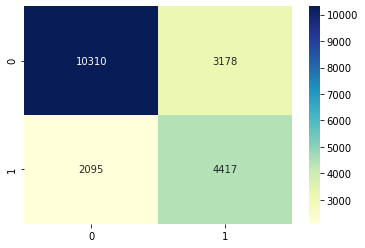

In [40]:
y_prob_xgb1_train = model_xgb1.predict_proba(X5)
y_prob_xgb2_train = model_xgb2.predict_proba(X4)
y_prob_xgb3_train = model_xgb3.predict_proba(X3)
y_prob_xgb4_train = model_xgb4.predict_proba(X2)
y_prob_xgb5_train = model_xgb5.predict_proba(X1)

y_th = (y_prob_xgb5_train[:,1] >= 0.35).astype(np.int64)
get_clf_eval(y1, y_th)

sum_f1_acc(y1, y_th)

In [41]:
optimal_threshold1 = 0.35
optimal_threshold2 = 0.35
optimal_threshold3 = 0.34
optimal_threshold4 = 0.38
optimal_threshold5 = 0.35

y_prob_xgb1 = model_xgb1.predict_proba(df_test)
y_prob_xgb2 = model_xgb2.predict_proba(df_test)
y_prob_xgb3 = model_xgb3.predict_proba(df_test)
y_prob_xgb4 = model_xgb4.predict_proba(df_test)
y_prob_xgb5 = model_xgb5.predict_proba(df_test)

output_xgb1 = (y_prob_xgb1[:,1] >= optimal_threshold1).astype(np.int64)
output_xgb2 = (y_prob_xgb2[:,1] >= optimal_threshold2).astype(np.int64)
output_xgb3 = (y_prob_xgb3[:,1] >= optimal_threshold3).astype(np.int64)
output_xgb4 = (y_prob_xgb4[:,1] >= optimal_threshold4).astype(np.int64)
output_xgb5 = (y_prob_xgb5[:,1] >= optimal_threshold5).astype(np.int64)

threshold_xgb = (optimal_threshold1 + optimal_threshold2 + optimal_threshold3 + 
                    optimal_threshold4 + optimal_threshold5) / 5

print('threshold:', threshold_xgb)

threshold: 0.354


In [42]:
model_lgbm1 = LGBMClassifier()
model_lgbm2 = LGBMClassifier()
model_lgbm3 = LGBMClassifier()
model_lgbm4 = LGBMClassifier()
model_lgbm5 = LGBMClassifier()

model_lgbm1.fit(X_train_1, y_train_1)
model_lgbm2.fit(X_train_2, y_train_2)
model_lgbm3.fit(X_train_3, y_train_3)
model_lgbm4.fit(X_train_4, y_train_4)
model_lgbm5.fit(X_train_5, y_train_5)

LGBMClassifier()


정확도: 0.7356
정밀도: 0.5776
재현율: 0.6995
AUC: 0.7263
F1: 0.6327


0.6841633838033061

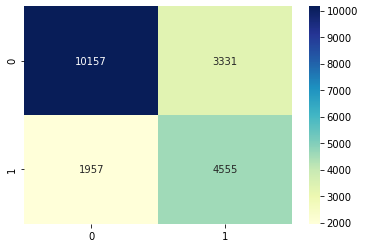

In [43]:
y_prob_lgbm1_train = model_lgbm1.predict_proba(X5)
y_prob_lgbm2_train = model_lgbm2.predict_proba(X4)
y_prob_lgbm3_train = model_lgbm3.predict_proba(X3)
y_prob_lgbm4_train = model_lgbm4.predict_proba(X2)
y_prob_lgbm5_train = model_lgbm5.predict_proba(X1)

y_th = (y_prob_lgbm5_train[:,1] >= 0.33).astype(np.int64)
get_clf_eval(y1, y_th)

sum_f1_acc(y1, y_th)

In [44]:
optimal_threshold1 = 0.34
optimal_threshold2 = 0.35
optimal_threshold3 = 0.33
optimal_threshold4 = 0.33
optimal_threshold5 = 0.34

y_prob_lgbm1 = model_lgbm1.predict_proba(df_test)
y_prob_lgbm2 = model_lgbm2.predict_proba(df_test)
y_prob_lgbm3 = model_lgbm3.predict_proba(df_test)
y_prob_lgbm4 = model_lgbm4.predict_proba(df_test)
y_prob_lgbm5 = model_lgbm5.predict_proba(df_test)

output_lgbm1 = (y_prob_lgbm1[:,1] >= optimal_threshold1).astype(np.int64)
output_lgbm2 = (y_prob_lgbm2[:,1] >= optimal_threshold2).astype(np.int64)
output_lgbm3 = (y_prob_lgbm3[:,1] >= optimal_threshold3).astype(np.int64)
output_lgbm4 = (y_prob_lgbm4[:,1] >= optimal_threshold4).astype(np.int64)
output_lgbm5 = (y_prob_lgbm5[:,1] >= optimal_threshold5).astype(np.int64)

threshold_lgbm = (optimal_threshold1 + optimal_threshold2 + optimal_threshold3 + 
                    optimal_threshold4 + optimal_threshold5) / 5

print('threshold:', threshold_lgbm)

threshold: 0.338


In [45]:
model_hgb1 = HistGradientBoostingClassifier()
model_hgb2 = HistGradientBoostingClassifier()
model_hgb3 = HistGradientBoostingClassifier()
model_hgb4 = HistGradientBoostingClassifier()
model_hgb5 = HistGradientBoostingClassifier()

model_hgb1.fit(X_train_1, y_train_1)
model_hgb2.fit(X_train_2, y_train_2)
model_hgb3.fit(X_train_3, y_train_3)
model_hgb4.fit(X_train_4, y_train_4)
model_hgb5.fit(X_train_5, y_train_5)

HistGradientBoostingClassifier()


정확도: 0.7419
정밀도: 0.5827
재현율: 0.6634
AUC: 0.7209
F1: 0.6205


0.6811506855105491

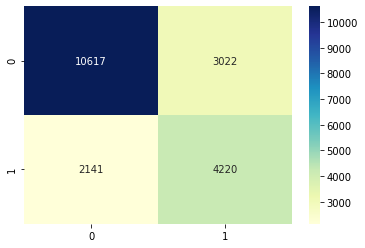

In [46]:
y_prob_hgb1_train = model_hgb1.predict_proba(X5)
y_prob_hgb2_train = model_hgb2.predict_proba(X4)
y_prob_hgb3_train = model_hgb3.predict_proba(X3)
y_prob_hgb4_train = model_hgb4.predict_proba(X2)
y_prob_hgb5_train = model_hgb5.predict_proba(X1)

y_th = (y_prob_hgb1_train[:,1] >= 0.36).astype(np.int64)
get_clf_eval(y5, y_th)

sum_f1_acc(y5, y_th)

In [47]:
optimal_threshold1 = 0.36
optimal_threshold2 = 0.35
optimal_threshold3 = 0.35
optimal_threshold4 = 0.37
optimal_threshold5 = 0.355

y_prob_hgb1 = model_hgb1.predict_proba(df_test)
y_prob_hgb2 = model_hgb2.predict_proba(df_test)
y_prob_hgb3 = model_hgb3.predict_proba(df_test)
y_prob_hgb4 = model_hgb4.predict_proba(df_test)
y_prob_hgb5 = model_hgb5.predict_proba(df_test)

output_hgb1 = (y_prob_hgb1[:,1] >= optimal_threshold1).astype(np.int64)
output_hgb2 = (y_prob_hgb2[:,1] >= optimal_threshold2).astype(np.int64)
output_hgb3 = (y_prob_hgb3[:,1] >= optimal_threshold3).astype(np.int64)
output_hgb4 = (y_prob_hgb4[:,1] >= optimal_threshold4).astype(np.int64)
output_hgb5 = (y_prob_hgb5[:,1] >= optimal_threshold5).astype(np.int64)

threshold_hgb = (optimal_threshold1 + optimal_threshold2 + optimal_threshold3 + 
                    optimal_threshold4 + optimal_threshold5) / 5

print('threshold:', threshold_hgb)

threshold: 0.35700000000000004


In [48]:
model_rnd1 = RandomForestClassifier()
model_rnd2 = RandomForestClassifier()
model_rnd3 = RandomForestClassifier()
model_rnd4 = RandomForestClassifier()
model_rnd5 = RandomForestClassifier()

model_rnd1.fit(X_train_1, y_train_1)
model_rnd2.fit(X_train_2, y_train_2)
model_rnd3.fit(X_train_3, y_train_3)
model_rnd4.fit(X_train_4, y_train_4)
model_rnd5.fit(X_train_5, y_train_5)

RandomForestClassifier()


정확도: 0.7289
정밀도: 0.5665
재현율: 0.6296
AUC: 0.7024
F1: 0.5964


0.6626657527362072

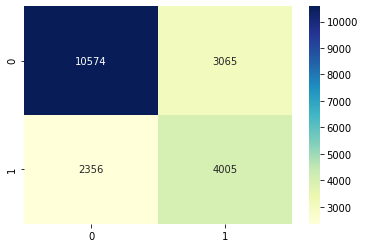

In [49]:
y_prob_rnd1_train = model_rnd1.predict_proba(X5)
y_prob_rnd2_train = model_rnd2.predict_proba(X4)
y_prob_rnd3_train = model_rnd3.predict_proba(X3)
y_prob_rnd4_train = model_rnd4.predict_proba(X2)
y_prob_rnd5_train = model_rnd5.predict_proba(X1)

y_th = (y_prob_rnd1_train[:,1] >= 0.38).astype(np.int64)
get_clf_eval(y5, y_th)

sum_f1_acc(y5, y_th)

In [50]:
optimal_threshold1 = 0.39
optimal_threshold2 = 0.4
optimal_threshold3 = 0.38
optimal_threshold4 = 0.4
optimal_threshold5 = 0.4

y_prob_rnd1 = model_rnd1.predict_proba(df_test)
y_prob_rnd2 = model_rnd2.predict_proba(df_test)
y_prob_rnd3 = model_rnd3.predict_proba(df_test)
y_prob_rnd4 = model_rnd4.predict_proba(df_test)
y_prob_rnd5 = model_rnd5.predict_proba(df_test)

output_rnd1 = (y_prob_rnd1[:,1] >= optimal_threshold1).astype(np.int64)
output_rnd2 = (y_prob_rnd2[:,1] >= optimal_threshold2).astype(np.int64)
output_rnd3 = (y_prob_rnd3[:,1] >= optimal_threshold3).astype(np.int64)
output_rnd4 = (y_prob_rnd4[:,1] >= optimal_threshold4).astype(np.int64)
output_rnd5 = (y_prob_rnd5[:,1] >= optimal_threshold5).astype(np.int64)

threshold_rnd = (optimal_threshold1 + optimal_threshold2 + optimal_threshold3 + 
                    optimal_threshold4 + optimal_threshold5) / 5

print('threshold:', threshold_rnd)

threshold: 0.39399999999999996


In [51]:
model_cat1 = CatBoostClassifier()
model_cat2 = CatBoostClassifier()
model_cat3 = CatBoostClassifier()
model_cat4 = CatBoostClassifier()
model_cat5 = CatBoostClassifier()

model_cat1.fit(X_train_1, y_train_1)
model_cat2.fit(X_train_2, y_train_2)
model_cat3.fit(X_train_3, y_train_3)
model_cat4.fit(X_train_4, y_train_4)
model_cat5.fit(X_train_5, y_train_5)

Learning rate set to 0.06692
0:	learn: 0.6760705	total: 102ms	remaining: 1m 42s
1:	learn: 0.6603132	total: 120ms	remaining: 59.9s
2:	learn: 0.6467266	total: 130ms	remaining: 43.2s
3:	learn: 0.6357865	total: 138ms	remaining: 34.5s
4:	learn: 0.6271677	total: 145ms	remaining: 28.9s
5:	learn: 0.6189199	total: 153ms	remaining: 25.3s
6:	learn: 0.6113760	total: 164ms	remaining: 23.2s
7:	learn: 0.6049376	total: 174ms	remaining: 21.6s
8:	learn: 0.5990633	total: 184ms	remaining: 20.3s
9:	learn: 0.5940397	total: 192ms	remaining: 19s
10:	learn: 0.5894513	total: 200ms	remaining: 17.9s
11:	learn: 0.5848815	total: 207ms	remaining: 17s
12:	learn: 0.5813135	total: 214ms	remaining: 16.3s
13:	learn: 0.5778043	total: 223ms	remaining: 15.7s
14:	learn: 0.5746748	total: 231ms	remaining: 15.2s
15:	learn: 0.5721958	total: 238ms	remaining: 14.7s
16:	learn: 0.5704059	total: 246ms	remaining: 14.2s
17:	learn: 0.5680779	total: 254ms	remaining: 13.8s
18:	learn: 0.5662798	total: 261ms	remaining: 13.5s
19:	learn: 0.56

182:	learn: 0.5048372	total: 1.58s	remaining: 7.07s
183:	learn: 0.5045990	total: 1.59s	remaining: 7.08s
184:	learn: 0.5044538	total: 1.6s	remaining: 7.07s
185:	learn: 0.5042697	total: 1.61s	remaining: 7.06s
186:	learn: 0.5041151	total: 1.62s	remaining: 7.04s
187:	learn: 0.5039123	total: 1.63s	remaining: 7.03s
188:	learn: 0.5037345	total: 1.64s	remaining: 7.02s
189:	learn: 0.5036099	total: 1.64s	remaining: 7s
190:	learn: 0.5035396	total: 1.65s	remaining: 6.99s
191:	learn: 0.5034163	total: 1.66s	remaining: 6.97s
192:	learn: 0.5033215	total: 1.66s	remaining: 6.96s
193:	learn: 0.5032006	total: 1.67s	remaining: 6.94s
194:	learn: 0.5030134	total: 1.68s	remaining: 6.93s
195:	learn: 0.5027679	total: 1.69s	remaining: 6.91s
196:	learn: 0.5025232	total: 1.69s	remaining: 6.9s
197:	learn: 0.5023108	total: 1.7s	remaining: 6.89s
198:	learn: 0.5021576	total: 1.71s	remaining: 6.87s
199:	learn: 0.5019216	total: 1.72s	remaining: 6.86s
200:	learn: 0.5018224	total: 1.72s	remaining: 6.84s
201:	learn: 0.5016

365:	learn: 0.4840801	total: 3.01s	remaining: 5.21s
366:	learn: 0.4839930	total: 3.02s	remaining: 5.21s
367:	learn: 0.4839150	total: 3.03s	remaining: 5.2s
368:	learn: 0.4838249	total: 3.04s	remaining: 5.19s
369:	learn: 0.4837364	total: 3.04s	remaining: 5.18s
370:	learn: 0.4836495	total: 3.05s	remaining: 5.18s
371:	learn: 0.4835711	total: 3.06s	remaining: 5.17s
372:	learn: 0.4834900	total: 3.07s	remaining: 5.16s
373:	learn: 0.4834270	total: 3.08s	remaining: 5.15s
374:	learn: 0.4833596	total: 3.08s	remaining: 5.14s
375:	learn: 0.4832899	total: 3.09s	remaining: 5.13s
376:	learn: 0.4832115	total: 3.1s	remaining: 5.12s
377:	learn: 0.4831236	total: 3.1s	remaining: 5.11s
378:	learn: 0.4830448	total: 3.11s	remaining: 5.1s
379:	learn: 0.4829674	total: 3.12s	remaining: 5.09s
380:	learn: 0.4828960	total: 3.13s	remaining: 5.08s
381:	learn: 0.4827361	total: 3.13s	remaining: 5.07s
382:	learn: 0.4826783	total: 3.14s	remaining: 5.06s
383:	learn: 0.4826119	total: 3.15s	remaining: 5.05s
384:	learn: 0.48

546:	learn: 0.4704303	total: 4.43s	remaining: 3.67s
547:	learn: 0.4703558	total: 4.45s	remaining: 3.67s
548:	learn: 0.4702694	total: 4.46s	remaining: 3.66s
549:	learn: 0.4702190	total: 4.46s	remaining: 3.65s
550:	learn: 0.4701600	total: 4.47s	remaining: 3.64s
551:	learn: 0.4700783	total: 4.48s	remaining: 3.63s
552:	learn: 0.4700369	total: 4.49s	remaining: 3.63s
553:	learn: 0.4699361	total: 4.49s	remaining: 3.62s
554:	learn: 0.4698916	total: 4.5s	remaining: 3.61s
555:	learn: 0.4698484	total: 4.51s	remaining: 3.6s
556:	learn: 0.4697890	total: 4.51s	remaining: 3.59s
557:	learn: 0.4697070	total: 4.52s	remaining: 3.58s
558:	learn: 0.4696646	total: 4.53s	remaining: 3.57s
559:	learn: 0.4695883	total: 4.54s	remaining: 3.56s
560:	learn: 0.4695139	total: 4.54s	remaining: 3.56s
561:	learn: 0.4694200	total: 4.55s	remaining: 3.55s
562:	learn: 0.4693566	total: 4.56s	remaining: 3.54s
563:	learn: 0.4692866	total: 4.57s	remaining: 3.53s
564:	learn: 0.4692203	total: 4.57s	remaining: 3.52s
565:	learn: 0.

730:	learn: 0.4590556	total: 5.88s	remaining: 2.16s
731:	learn: 0.4590295	total: 5.88s	remaining: 2.15s
732:	learn: 0.4589908	total: 5.89s	remaining: 2.15s
733:	learn: 0.4589415	total: 5.9s	remaining: 2.14s
734:	learn: 0.4588777	total: 5.91s	remaining: 2.13s
735:	learn: 0.4588003	total: 5.92s	remaining: 2.12s
736:	learn: 0.4587416	total: 5.93s	remaining: 2.12s
737:	learn: 0.4587021	total: 5.93s	remaining: 2.11s
738:	learn: 0.4586398	total: 5.94s	remaining: 2.1s
739:	learn: 0.4585822	total: 5.95s	remaining: 2.09s
740:	learn: 0.4585393	total: 5.96s	remaining: 2.08s
741:	learn: 0.4584884	total: 5.96s	remaining: 2.07s
742:	learn: 0.4584180	total: 5.97s	remaining: 2.06s
743:	learn: 0.4583462	total: 5.98s	remaining: 2.06s
744:	learn: 0.4583053	total: 5.99s	remaining: 2.05s
745:	learn: 0.4582623	total: 5.99s	remaining: 2.04s
746:	learn: 0.4582202	total: 6s	remaining: 2.03s
747:	learn: 0.4581792	total: 6.01s	remaining: 2.02s
748:	learn: 0.4581045	total: 6.02s	remaining: 2.02s
749:	learn: 0.458

912:	learn: 0.4494756	total: 7.28s	remaining: 694ms
913:	learn: 0.4494408	total: 7.29s	remaining: 686ms
914:	learn: 0.4493956	total: 7.3s	remaining: 679ms
915:	learn: 0.4493917	total: 7.31s	remaining: 671ms
916:	learn: 0.4493400	total: 7.32s	remaining: 662ms
917:	learn: 0.4492942	total: 7.33s	remaining: 654ms
918:	learn: 0.4492438	total: 7.33s	remaining: 646ms
919:	learn: 0.4492010	total: 7.34s	remaining: 638ms
920:	learn: 0.4491356	total: 7.35s	remaining: 630ms
921:	learn: 0.4490843	total: 7.36s	remaining: 622ms
922:	learn: 0.4490077	total: 7.37s	remaining: 614ms
923:	learn: 0.4489568	total: 7.37s	remaining: 606ms
924:	learn: 0.4488926	total: 7.38s	remaining: 598ms
925:	learn: 0.4488381	total: 7.39s	remaining: 590ms
926:	learn: 0.4487852	total: 7.39s	remaining: 582ms
927:	learn: 0.4487453	total: 7.4s	remaining: 574ms
928:	learn: 0.4486869	total: 7.41s	remaining: 566ms
929:	learn: 0.4486459	total: 7.42s	remaining: 558ms
930:	learn: 0.4486179	total: 7.42s	remaining: 550ms
931:	learn: 0.

89:	learn: 0.5190727	total: 802ms	remaining: 8.11s
90:	learn: 0.5187639	total: 813ms	remaining: 8.12s
91:	learn: 0.5185808	total: 821ms	remaining: 8.1s
92:	learn: 0.5183661	total: 828ms	remaining: 8.08s
93:	learn: 0.5179470	total: 836ms	remaining: 8.06s
94:	learn: 0.5176558	total: 843ms	remaining: 8.03s
95:	learn: 0.5175528	total: 850ms	remaining: 8s
96:	learn: 0.5172376	total: 857ms	remaining: 7.98s
97:	learn: 0.5170438	total: 865ms	remaining: 7.96s
98:	learn: 0.5166303	total: 872ms	remaining: 7.94s
99:	learn: 0.5164579	total: 880ms	remaining: 7.92s
100:	learn: 0.5162913	total: 887ms	remaining: 7.89s
101:	learn: 0.5162030	total: 894ms	remaining: 7.87s
102:	learn: 0.5160660	total: 902ms	remaining: 7.85s
103:	learn: 0.5157005	total: 909ms	remaining: 7.83s
104:	learn: 0.5155004	total: 916ms	remaining: 7.81s
105:	learn: 0.5151614	total: 924ms	remaining: 7.79s
106:	learn: 0.5149782	total: 931ms	remaining: 7.77s
107:	learn: 0.5148435	total: 939ms	remaining: 7.75s
108:	learn: 0.5146653	total

273:	learn: 0.4898796	total: 2.23s	remaining: 5.92s
274:	learn: 0.4897843	total: 2.25s	remaining: 5.92s
275:	learn: 0.4896459	total: 2.25s	remaining: 5.92s
276:	learn: 0.4895351	total: 2.26s	remaining: 5.91s
277:	learn: 0.4894419	total: 2.27s	remaining: 5.9s
278:	learn: 0.4892799	total: 2.28s	remaining: 5.89s
279:	learn: 0.4891862	total: 2.29s	remaining: 5.88s
280:	learn: 0.4890836	total: 2.29s	remaining: 5.87s
281:	learn: 0.4889879	total: 2.3s	remaining: 5.86s
282:	learn: 0.4889291	total: 2.31s	remaining: 5.86s
283:	learn: 0.4887358	total: 2.32s	remaining: 5.85s
284:	learn: 0.4885673	total: 2.33s	remaining: 5.84s
285:	learn: 0.4884175	total: 2.34s	remaining: 5.83s
286:	learn: 0.4882576	total: 2.34s	remaining: 5.83s
287:	learn: 0.4881829	total: 2.35s	remaining: 5.82s
288:	learn: 0.4880833	total: 2.36s	remaining: 5.8s
289:	learn: 0.4879388	total: 2.37s	remaining: 5.8s
290:	learn: 0.4878618	total: 2.37s	remaining: 5.79s
291:	learn: 0.4877024	total: 2.38s	remaining: 5.78s
292:	learn: 0.48

454:	learn: 0.4740220	total: 3.65s	remaining: 4.37s
455:	learn: 0.4739356	total: 3.66s	remaining: 4.37s
456:	learn: 0.4738605	total: 3.67s	remaining: 4.37s
457:	learn: 0.4737901	total: 3.68s	remaining: 4.36s
458:	learn: 0.4737344	total: 3.69s	remaining: 4.35s
459:	learn: 0.4736396	total: 3.7s	remaining: 4.34s
460:	learn: 0.4735785	total: 3.7s	remaining: 4.33s
461:	learn: 0.4735184	total: 3.71s	remaining: 4.32s
462:	learn: 0.4734386	total: 3.72s	remaining: 4.31s
463:	learn: 0.4733763	total: 3.73s	remaining: 4.3s
464:	learn: 0.4733362	total: 3.73s	remaining: 4.29s
465:	learn: 0.4732523	total: 3.74s	remaining: 4.29s
466:	learn: 0.4731134	total: 3.75s	remaining: 4.28s
467:	learn: 0.4730180	total: 3.76s	remaining: 4.27s
468:	learn: 0.4729282	total: 3.76s	remaining: 4.26s
469:	learn: 0.4728553	total: 3.77s	remaining: 4.25s
470:	learn: 0.4727870	total: 3.78s	remaining: 4.24s
471:	learn: 0.4727331	total: 3.79s	remaining: 4.24s
472:	learn: 0.4726671	total: 3.79s	remaining: 4.23s
473:	learn: 0.4

635:	learn: 0.4615599	total: 5.07s	remaining: 2.9s
636:	learn: 0.4615093	total: 5.08s	remaining: 2.9s
637:	learn: 0.4614635	total: 5.1s	remaining: 2.89s
638:	learn: 0.4613802	total: 5.1s	remaining: 2.88s
639:	learn: 0.4613295	total: 5.11s	remaining: 2.88s
640:	learn: 0.4612591	total: 5.12s	remaining: 2.87s
641:	learn: 0.4611888	total: 5.13s	remaining: 2.86s
642:	learn: 0.4611291	total: 5.13s	remaining: 2.85s
643:	learn: 0.4610716	total: 5.14s	remaining: 2.84s
644:	learn: 0.4610160	total: 5.15s	remaining: 2.83s
645:	learn: 0.4609202	total: 5.16s	remaining: 2.83s
646:	learn: 0.4608528	total: 5.16s	remaining: 2.82s
647:	learn: 0.4607813	total: 5.17s	remaining: 2.81s
648:	learn: 0.4607282	total: 5.18s	remaining: 2.8s
649:	learn: 0.4606641	total: 5.19s	remaining: 2.79s
650:	learn: 0.4606010	total: 5.19s	remaining: 2.78s
651:	learn: 0.4605366	total: 5.2s	remaining: 2.78s
652:	learn: 0.4604731	total: 5.21s	remaining: 2.77s
653:	learn: 0.4604031	total: 5.22s	remaining: 2.76s
654:	learn: 0.4603

815:	learn: 0.4512444	total: 6.49s	remaining: 1.46s
816:	learn: 0.4511886	total: 6.5s	remaining: 1.46s
817:	learn: 0.4511319	total: 6.51s	remaining: 1.45s
818:	learn: 0.4510755	total: 6.52s	remaining: 1.44s
819:	learn: 0.4510405	total: 6.53s	remaining: 1.43s
820:	learn: 0.4509886	total: 6.54s	remaining: 1.43s
821:	learn: 0.4509385	total: 6.54s	remaining: 1.42s
822:	learn: 0.4508780	total: 6.55s	remaining: 1.41s
823:	learn: 0.4508384	total: 6.56s	remaining: 1.4s
824:	learn: 0.4507973	total: 6.57s	remaining: 1.39s
825:	learn: 0.4507336	total: 6.58s	remaining: 1.39s
826:	learn: 0.4506859	total: 6.58s	remaining: 1.38s
827:	learn: 0.4506286	total: 6.59s	remaining: 1.37s
828:	learn: 0.4505739	total: 6.6s	remaining: 1.36s
829:	learn: 0.4505212	total: 6.61s	remaining: 1.35s
830:	learn: 0.4504659	total: 6.62s	remaining: 1.34s
831:	learn: 0.4504282	total: 6.62s	remaining: 1.34s
832:	learn: 0.4503695	total: 6.63s	remaining: 1.33s
833:	learn: 0.4503030	total: 6.64s	remaining: 1.32s
834:	learn: 0.4

997:	learn: 0.4415585	total: 7.91s	remaining: 15.9ms
998:	learn: 0.4415198	total: 7.92s	remaining: 7.93ms
999:	learn: 0.4414901	total: 7.94s	remaining: 0us
Learning rate set to 0.06692
0:	learn: 0.6758876	total: 24.7ms	remaining: 24.6s
1:	learn: 0.6597970	total: 47.3ms	remaining: 23.6s
2:	learn: 0.6467227	total: 68ms	remaining: 22.6s
3:	learn: 0.6354542	total: 89.4ms	remaining: 22.3s
4:	learn: 0.6266218	total: 102ms	remaining: 20.4s
5:	learn: 0.6182965	total: 113ms	remaining: 18.8s
6:	learn: 0.6103710	total: 122ms	remaining: 17.3s
7:	learn: 0.6038697	total: 132ms	remaining: 16.3s
8:	learn: 0.5979581	total: 139ms	remaining: 15.3s
9:	learn: 0.5929981	total: 147ms	remaining: 14.5s
10:	learn: 0.5883396	total: 154ms	remaining: 13.9s
11:	learn: 0.5837392	total: 162ms	remaining: 13.3s
12:	learn: 0.5802286	total: 169ms	remaining: 12.9s
13:	learn: 0.5767127	total: 177ms	remaining: 12.5s
14:	learn: 0.5740135	total: 185ms	remaining: 12.1s
15:	learn: 0.5712980	total: 196ms	remaining: 12s
16:	learn

169:	learn: 0.5047085	total: 1.41s	remaining: 6.88s
170:	learn: 0.5044509	total: 1.42s	remaining: 6.88s
171:	learn: 0.5043454	total: 1.43s	remaining: 6.87s
172:	learn: 0.5041789	total: 1.44s	remaining: 6.86s
173:	learn: 0.5039647	total: 1.44s	remaining: 6.85s
174:	learn: 0.5037623	total: 1.45s	remaining: 6.84s
175:	learn: 0.5035756	total: 1.46s	remaining: 6.83s
176:	learn: 0.5033963	total: 1.47s	remaining: 6.82s
177:	learn: 0.5032224	total: 1.47s	remaining: 6.8s
178:	learn: 0.5030160	total: 1.48s	remaining: 6.79s
179:	learn: 0.5029062	total: 1.49s	remaining: 6.78s
180:	learn: 0.5028083	total: 1.49s	remaining: 6.76s
181:	learn: 0.5026795	total: 1.5s	remaining: 6.75s
182:	learn: 0.5025523	total: 1.51s	remaining: 6.74s
183:	learn: 0.5024317	total: 1.52s	remaining: 6.72s
184:	learn: 0.5023455	total: 1.52s	remaining: 6.71s
185:	learn: 0.5022484	total: 1.53s	remaining: 6.7s
186:	learn: 0.5021164	total: 1.54s	remaining: 6.69s
187:	learn: 0.5018996	total: 1.55s	remaining: 6.68s
188:	learn: 0.5

352:	learn: 0.4834894	total: 2.83s	remaining: 5.18s
353:	learn: 0.4834373	total: 2.84s	remaining: 5.18s
354:	learn: 0.4833576	total: 2.85s	remaining: 5.18s
355:	learn: 0.4832416	total: 2.86s	remaining: 5.17s
356:	learn: 0.4831634	total: 2.87s	remaining: 5.16s
357:	learn: 0.4830734	total: 2.87s	remaining: 5.15s
358:	learn: 0.4829792	total: 2.88s	remaining: 5.14s
359:	learn: 0.4828998	total: 2.89s	remaining: 5.13s
360:	learn: 0.4828187	total: 2.9s	remaining: 5.13s
361:	learn: 0.4827398	total: 2.9s	remaining: 5.12s
362:	learn: 0.4826738	total: 2.91s	remaining: 5.11s
363:	learn: 0.4825795	total: 2.92s	remaining: 5.1s
364:	learn: 0.4824886	total: 2.92s	remaining: 5.09s
365:	learn: 0.4824219	total: 2.93s	remaining: 5.08s
366:	learn: 0.4823205	total: 2.94s	remaining: 5.07s
367:	learn: 0.4822571	total: 2.95s	remaining: 5.06s
368:	learn: 0.4821827	total: 2.96s	remaining: 5.05s
369:	learn: 0.4820928	total: 2.96s	remaining: 5.04s
370:	learn: 0.4820204	total: 2.97s	remaining: 5.04s
371:	learn: 0.4

535:	learn: 0.4699089	total: 4.25s	remaining: 3.68s
536:	learn: 0.4698407	total: 4.26s	remaining: 3.67s
537:	learn: 0.4697856	total: 4.27s	remaining: 3.66s
538:	learn: 0.4697221	total: 4.28s	remaining: 3.66s
539:	learn: 0.4696349	total: 4.28s	remaining: 3.65s
540:	learn: 0.4695540	total: 4.29s	remaining: 3.64s
541:	learn: 0.4694940	total: 4.3s	remaining: 3.63s
542:	learn: 0.4694495	total: 4.31s	remaining: 3.63s
543:	learn: 0.4693858	total: 4.32s	remaining: 3.62s
544:	learn: 0.4693440	total: 4.32s	remaining: 3.61s
545:	learn: 0.4692865	total: 4.33s	remaining: 3.6s
546:	learn: 0.4691926	total: 4.34s	remaining: 3.59s
547:	learn: 0.4691424	total: 4.34s	remaining: 3.58s
548:	learn: 0.4690829	total: 4.35s	remaining: 3.58s
549:	learn: 0.4690176	total: 4.36s	remaining: 3.57s
550:	learn: 0.4689645	total: 4.37s	remaining: 3.56s
551:	learn: 0.4689240	total: 4.37s	remaining: 3.55s
552:	learn: 0.4688520	total: 4.38s	remaining: 3.54s
553:	learn: 0.4688139	total: 4.39s	remaining: 3.53s
554:	learn: 0.

717:	learn: 0.4589534	total: 5.67s	remaining: 2.23s
718:	learn: 0.4588714	total: 5.68s	remaining: 2.22s
719:	learn: 0.4588084	total: 5.7s	remaining: 2.21s
720:	learn: 0.4587542	total: 5.71s	remaining: 2.21s
721:	learn: 0.4587238	total: 5.71s	remaining: 2.2s
722:	learn: 0.4586614	total: 5.72s	remaining: 2.19s
723:	learn: 0.4586087	total: 5.73s	remaining: 2.18s
724:	learn: 0.4585226	total: 5.74s	remaining: 2.17s
725:	learn: 0.4584497	total: 5.74s	remaining: 2.17s
726:	learn: 0.4583891	total: 5.75s	remaining: 2.16s
727:	learn: 0.4583181	total: 5.76s	remaining: 2.15s
728:	learn: 0.4582536	total: 5.77s	remaining: 2.14s
729:	learn: 0.4582100	total: 5.77s	remaining: 2.13s
730:	learn: 0.4581793	total: 5.78s	remaining: 2.13s
731:	learn: 0.4581039	total: 5.79s	remaining: 2.12s
732:	learn: 0.4580205	total: 5.79s	remaining: 2.11s
733:	learn: 0.4579286	total: 5.8s	remaining: 2.1s
734:	learn: 0.4578777	total: 5.81s	remaining: 2.09s
735:	learn: 0.4578175	total: 5.82s	remaining: 2.09s
736:	learn: 0.45

898:	learn: 0.4486812	total: 7.1s	remaining: 798ms
899:	learn: 0.4486360	total: 7.11s	remaining: 790ms
900:	learn: 0.4485874	total: 7.12s	remaining: 783ms
901:	learn: 0.4485165	total: 7.13s	remaining: 775ms
902:	learn: 0.4484827	total: 7.14s	remaining: 767ms
903:	learn: 0.4484404	total: 7.14s	remaining: 759ms
904:	learn: 0.4483767	total: 7.15s	remaining: 751ms
905:	learn: 0.4483047	total: 7.16s	remaining: 743ms
906:	learn: 0.4482586	total: 7.17s	remaining: 735ms
907:	learn: 0.4481942	total: 7.17s	remaining: 727ms
908:	learn: 0.4481285	total: 7.18s	remaining: 719ms
909:	learn: 0.4480734	total: 7.19s	remaining: 711ms
910:	learn: 0.4479879	total: 7.2s	remaining: 703ms
911:	learn: 0.4479579	total: 7.21s	remaining: 695ms
912:	learn: 0.4479247	total: 7.21s	remaining: 687ms
913:	learn: 0.4478884	total: 7.22s	remaining: 679ms
914:	learn: 0.4478265	total: 7.23s	remaining: 671ms
915:	learn: 0.4477785	total: 7.23s	remaining: 663ms
916:	learn: 0.4477182	total: 7.24s	remaining: 655ms
917:	learn: 0.

65:	learn: 0.5285972	total: 602ms	remaining: 8.52s
66:	learn: 0.5281419	total: 612ms	remaining: 8.52s
67:	learn: 0.5276467	total: 624ms	remaining: 8.55s
68:	learn: 0.5272770	total: 631ms	remaining: 8.52s
69:	learn: 0.5269645	total: 639ms	remaining: 8.49s
70:	learn: 0.5265160	total: 647ms	remaining: 8.46s
71:	learn: 0.5260646	total: 654ms	remaining: 8.43s
72:	learn: 0.5257927	total: 661ms	remaining: 8.4s
73:	learn: 0.5253396	total: 669ms	remaining: 8.37s
74:	learn: 0.5250904	total: 677ms	remaining: 8.34s
75:	learn: 0.5248311	total: 684ms	remaining: 8.32s
76:	learn: 0.5245674	total: 692ms	remaining: 8.29s
77:	learn: 0.5241888	total: 699ms	remaining: 8.27s
78:	learn: 0.5238672	total: 707ms	remaining: 8.24s
79:	learn: 0.5236177	total: 714ms	remaining: 8.21s
80:	learn: 0.5233076	total: 722ms	remaining: 8.19s
81:	learn: 0.5230919	total: 729ms	remaining: 8.16s
82:	learn: 0.5227306	total: 737ms	remaining: 8.14s
83:	learn: 0.5225065	total: 744ms	remaining: 8.11s
84:	learn: 0.5223149	total: 751m

247:	learn: 0.4951322	total: 2.01s	remaining: 6.1s
248:	learn: 0.4950099	total: 2.02s	remaining: 6.1s
249:	learn: 0.4949077	total: 2.03s	remaining: 6.1s
250:	learn: 0.4948213	total: 2.04s	remaining: 6.09s
251:	learn: 0.4947784	total: 2.05s	remaining: 6.08s
252:	learn: 0.4946764	total: 2.06s	remaining: 6.07s
253:	learn: 0.4945951	total: 2.06s	remaining: 6.06s
254:	learn: 0.4944784	total: 2.07s	remaining: 6.05s
255:	learn: 0.4943088	total: 2.08s	remaining: 6.04s
256:	learn: 0.4941808	total: 2.09s	remaining: 6.03s
257:	learn: 0.4940404	total: 2.09s	remaining: 6.02s
258:	learn: 0.4939556	total: 2.1s	remaining: 6.01s
259:	learn: 0.4938086	total: 2.11s	remaining: 6s
260:	learn: 0.4936593	total: 2.12s	remaining: 5.99s
261:	learn: 0.4936055	total: 2.13s	remaining: 5.99s
262:	learn: 0.4934815	total: 2.13s	remaining: 5.98s
263:	learn: 0.4933487	total: 2.14s	remaining: 5.97s
264:	learn: 0.4932391	total: 2.15s	remaining: 5.96s
265:	learn: 0.4931042	total: 2.16s	remaining: 5.95s
266:	learn: 0.49302

428:	learn: 0.4783532	total: 3.42s	remaining: 4.56s
429:	learn: 0.4782979	total: 3.43s	remaining: 4.55s
430:	learn: 0.4782121	total: 3.44s	remaining: 4.55s
431:	learn: 0.4781520	total: 3.45s	remaining: 4.54s
432:	learn: 0.4780927	total: 3.46s	remaining: 4.53s
433:	learn: 0.4780028	total: 3.47s	remaining: 4.52s
434:	learn: 0.4779359	total: 3.48s	remaining: 4.51s
435:	learn: 0.4778741	total: 3.48s	remaining: 4.51s
436:	learn: 0.4778137	total: 3.49s	remaining: 4.5s
437:	learn: 0.4777678	total: 3.5s	remaining: 4.49s
438:	learn: 0.4776932	total: 3.5s	remaining: 4.48s
439:	learn: 0.4776085	total: 3.51s	remaining: 4.47s
440:	learn: 0.4775267	total: 3.52s	remaining: 4.46s
441:	learn: 0.4774646	total: 3.53s	remaining: 4.45s
442:	learn: 0.4773416	total: 3.54s	remaining: 4.45s
443:	learn: 0.4772732	total: 3.54s	remaining: 4.44s
444:	learn: 0.4772193	total: 3.55s	remaining: 4.43s
445:	learn: 0.4771829	total: 3.56s	remaining: 4.42s
446:	learn: 0.4771145	total: 3.56s	remaining: 4.41s
447:	learn: 0.4

611:	learn: 0.4662897	total: 4.86s	remaining: 3.08s
612:	learn: 0.4662074	total: 4.87s	remaining: 3.07s
613:	learn: 0.4661524	total: 4.88s	remaining: 3.07s
614:	learn: 0.4660927	total: 4.88s	remaining: 3.06s
615:	learn: 0.4660496	total: 4.89s	remaining: 3.05s
616:	learn: 0.4659651	total: 4.9s	remaining: 3.04s
617:	learn: 0.4659059	total: 4.91s	remaining: 3.03s
618:	learn: 0.4658396	total: 4.92s	remaining: 3.03s
619:	learn: 0.4657577	total: 4.92s	remaining: 3.02s
620:	learn: 0.4656859	total: 4.93s	remaining: 3.01s
621:	learn: 0.4656024	total: 4.94s	remaining: 3s
622:	learn: 0.4655552	total: 4.95s	remaining: 2.99s
623:	learn: 0.4654785	total: 4.95s	remaining: 2.98s
624:	learn: 0.4654156	total: 4.96s	remaining: 2.98s
625:	learn: 0.4653683	total: 4.97s	remaining: 2.97s
626:	learn: 0.4652904	total: 4.98s	remaining: 2.96s
627:	learn: 0.4652333	total: 4.98s	remaining: 2.95s
628:	learn: 0.4651277	total: 4.99s	remaining: 2.94s
629:	learn: 0.4650844	total: 5s	remaining: 2.94s
630:	learn: 0.46500

793:	learn: 0.4559178	total: 6.28s	remaining: 1.63s
794:	learn: 0.4558650	total: 6.29s	remaining: 1.62s
795:	learn: 0.4558210	total: 6.3s	remaining: 1.61s
796:	learn: 0.4557596	total: 6.3s	remaining: 1.6s
797:	learn: 0.4557036	total: 6.31s	remaining: 1.6s
798:	learn: 0.4556367	total: 6.32s	remaining: 1.59s
799:	learn: 0.4555684	total: 6.33s	remaining: 1.58s
800:	learn: 0.4554999	total: 6.33s	remaining: 1.57s
801:	learn: 0.4554413	total: 6.34s	remaining: 1.56s
802:	learn: 0.4553932	total: 6.35s	remaining: 1.56s
803:	learn: 0.4553388	total: 6.36s	remaining: 1.55s
804:	learn: 0.4552654	total: 6.36s	remaining: 1.54s
805:	learn: 0.4552074	total: 6.37s	remaining: 1.53s
806:	learn: 0.4551630	total: 6.38s	remaining: 1.52s
807:	learn: 0.4551072	total: 6.39s	remaining: 1.52s
808:	learn: 0.4550649	total: 6.39s	remaining: 1.51s
809:	learn: 0.4550229	total: 6.4s	remaining: 1.5s
810:	learn: 0.4549613	total: 6.41s	remaining: 1.49s
811:	learn: 0.4549103	total: 6.42s	remaining: 1.49s
812:	learn: 0.4548

971:	learn: 0.4466164	total: 7.68s	remaining: 221ms
972:	learn: 0.4465726	total: 7.69s	remaining: 213ms
973:	learn: 0.4465305	total: 7.7s	remaining: 206ms
974:	learn: 0.4465016	total: 7.71s	remaining: 198ms
975:	learn: 0.4464708	total: 7.72s	remaining: 190ms
976:	learn: 0.4463726	total: 7.73s	remaining: 182ms
977:	learn: 0.4463213	total: 7.73s	remaining: 174ms
978:	learn: 0.4462612	total: 7.74s	remaining: 166ms
979:	learn: 0.4462057	total: 7.75s	remaining: 158ms
980:	learn: 0.4461513	total: 7.76s	remaining: 150ms
981:	learn: 0.4460789	total: 7.76s	remaining: 142ms
982:	learn: 0.4460348	total: 7.77s	remaining: 134ms
983:	learn: 0.4459832	total: 7.78s	remaining: 127ms
984:	learn: 0.4459063	total: 7.79s	remaining: 119ms
985:	learn: 0.4458411	total: 7.79s	remaining: 111ms
986:	learn: 0.4457847	total: 7.8s	remaining: 103ms
987:	learn: 0.4457236	total: 7.81s	remaining: 94.9ms
988:	learn: 0.4456506	total: 7.82s	remaining: 87ms
989:	learn: 0.4455681	total: 7.83s	remaining: 79.1ms
990:	learn: 0

143:	learn: 0.5093275	total: 1.21s	remaining: 7.22s
144:	learn: 0.5091548	total: 1.23s	remaining: 7.23s
145:	learn: 0.5089209	total: 1.24s	remaining: 7.23s
146:	learn: 0.5086704	total: 1.24s	remaining: 7.21s
147:	learn: 0.5084561	total: 1.25s	remaining: 7.2s
148:	learn: 0.5083600	total: 1.26s	remaining: 7.18s
149:	learn: 0.5081599	total: 1.26s	remaining: 7.17s
150:	learn: 0.5080183	total: 1.27s	remaining: 7.15s
151:	learn: 0.5077600	total: 1.28s	remaining: 7.14s
152:	learn: 0.5075877	total: 1.29s	remaining: 7.12s
153:	learn: 0.5074587	total: 1.29s	remaining: 7.11s
154:	learn: 0.5072332	total: 1.3s	remaining: 7.1s
155:	learn: 0.5070429	total: 1.31s	remaining: 7.08s
156:	learn: 0.5069422	total: 1.32s	remaining: 7.07s
157:	learn: 0.5068276	total: 1.32s	remaining: 7.05s
158:	learn: 0.5065937	total: 1.33s	remaining: 7.04s
159:	learn: 0.5064574	total: 1.34s	remaining: 7.03s
160:	learn: 0.5062804	total: 1.35s	remaining: 7.02s
161:	learn: 0.5061541	total: 1.36s	remaining: 7.02s
162:	learn: 0.5

326:	learn: 0.4858196	total: 2.63s	remaining: 5.41s
327:	learn: 0.4857249	total: 2.64s	remaining: 5.4s
328:	learn: 0.4856529	total: 2.65s	remaining: 5.4s
329:	learn: 0.4855250	total: 2.66s	remaining: 5.39s
330:	learn: 0.4854648	total: 2.66s	remaining: 5.38s
331:	learn: 0.4853427	total: 2.67s	remaining: 5.37s
332:	learn: 0.4852547	total: 2.68s	remaining: 5.37s
333:	learn: 0.4851705	total: 2.69s	remaining: 5.36s
334:	learn: 0.4850781	total: 2.69s	remaining: 5.35s
335:	learn: 0.4850157	total: 2.7s	remaining: 5.34s
336:	learn: 0.4849546	total: 2.71s	remaining: 5.33s
337:	learn: 0.4848465	total: 2.71s	remaining: 5.32s
338:	learn: 0.4847650	total: 2.72s	remaining: 5.31s
339:	learn: 0.4846930	total: 2.73s	remaining: 5.3s
340:	learn: 0.4845928	total: 2.74s	remaining: 5.29s
341:	learn: 0.4844857	total: 2.75s	remaining: 5.28s
342:	learn: 0.4843957	total: 2.75s	remaining: 5.27s
343:	learn: 0.4843543	total: 2.76s	remaining: 5.26s
344:	learn: 0.4842633	total: 2.77s	remaining: 5.25s
345:	learn: 0.48

508:	learn: 0.4717140	total: 4.04s	remaining: 3.9s
509:	learn: 0.4716627	total: 4.05s	remaining: 3.9s
510:	learn: 0.4715892	total: 4.07s	remaining: 3.89s
511:	learn: 0.4715144	total: 4.07s	remaining: 3.88s
512:	learn: 0.4714519	total: 4.08s	remaining: 3.88s
513:	learn: 0.4713940	total: 4.09s	remaining: 3.87s
514:	learn: 0.4713509	total: 4.1s	remaining: 3.86s
515:	learn: 0.4713237	total: 4.1s	remaining: 3.85s
516:	learn: 0.4712707	total: 4.11s	remaining: 3.84s
517:	learn: 0.4712314	total: 4.12s	remaining: 3.83s
518:	learn: 0.4711690	total: 4.13s	remaining: 3.82s
519:	learn: 0.4711076	total: 4.13s	remaining: 3.81s
520:	learn: 0.4710480	total: 4.14s	remaining: 3.81s
521:	learn: 0.4710014	total: 4.15s	remaining: 3.8s
522:	learn: 0.4709384	total: 4.15s	remaining: 3.79s
523:	learn: 0.4708548	total: 4.16s	remaining: 3.78s
524:	learn: 0.4707624	total: 4.17s	remaining: 3.77s
525:	learn: 0.4707088	total: 4.18s	remaining: 3.76s
526:	learn: 0.4706497	total: 4.18s	remaining: 3.75s
527:	learn: 0.470

692:	learn: 0.4604327	total: 5.47s	remaining: 2.42s
693:	learn: 0.4603595	total: 5.48s	remaining: 2.42s
694:	learn: 0.4603116	total: 5.49s	remaining: 2.41s
695:	learn: 0.4602205	total: 5.5s	remaining: 2.4s
696:	learn: 0.4601642	total: 5.51s	remaining: 2.4s
697:	learn: 0.4600994	total: 5.52s	remaining: 2.39s
698:	learn: 0.4600407	total: 5.53s	remaining: 2.38s
699:	learn: 0.4599682	total: 5.53s	remaining: 2.37s
700:	learn: 0.4598860	total: 5.54s	remaining: 2.36s
701:	learn: 0.4598416	total: 5.55s	remaining: 2.35s
702:	learn: 0.4597917	total: 5.55s	remaining: 2.35s
703:	learn: 0.4597216	total: 5.56s	remaining: 2.34s
704:	learn: 0.4596730	total: 5.57s	remaining: 2.33s
705:	learn: 0.4596068	total: 5.58s	remaining: 2.32s
706:	learn: 0.4595356	total: 5.59s	remaining: 2.31s
707:	learn: 0.4594804	total: 5.59s	remaining: 2.31s
708:	learn: 0.4594488	total: 5.6s	remaining: 2.3s
709:	learn: 0.4593920	total: 5.61s	remaining: 2.29s
710:	learn: 0.4593373	total: 5.62s	remaining: 2.28s
711:	learn: 0.459

875:	learn: 0.4501683	total: 6.9s	remaining: 977ms
876:	learn: 0.4501123	total: 6.91s	remaining: 970ms
877:	learn: 0.4500489	total: 6.92s	remaining: 962ms
878:	learn: 0.4499798	total: 6.93s	remaining: 954ms
879:	learn: 0.4499462	total: 6.94s	remaining: 946ms
880:	learn: 0.4498911	total: 6.95s	remaining: 938ms
881:	learn: 0.4498336	total: 6.95s	remaining: 930ms
882:	learn: 0.4497852	total: 6.96s	remaining: 922ms
883:	learn: 0.4497359	total: 6.97s	remaining: 915ms
884:	learn: 0.4496683	total: 6.98s	remaining: 907ms
885:	learn: 0.4496070	total: 6.99s	remaining: 899ms
886:	learn: 0.4495477	total: 6.99s	remaining: 891ms
887:	learn: 0.4494786	total: 7s	remaining: 883ms
888:	learn: 0.4494338	total: 7.01s	remaining: 875ms
889:	learn: 0.4493882	total: 7.02s	remaining: 867ms
890:	learn: 0.4493301	total: 7.02s	remaining: 859ms
891:	learn: 0.4492838	total: 7.03s	remaining: 851ms
892:	learn: 0.4492377	total: 7.04s	remaining: 843ms
893:	learn: 0.4491924	total: 7.05s	remaining: 836ms
894:	learn: 0.44


정확도: 0.7421
정밀도: 0.5922
재현율: 0.6677
AUC: 0.7229
F1: 0.6277


0.684894377075213

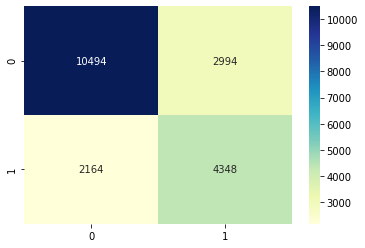

In [52]:
y_prob_cat1_train = model_cat1.predict_proba(X5)
y_prob_cat2_train = model_cat2.predict_proba(X4)
y_prob_cat3_train = model_cat3.predict_proba(X3)
y_prob_cat4_train = model_cat4.predict_proba(X2)
y_prob_cat5_train = model_cat5.predict_proba(X1)

y_th = (y_prob_cat5_train[:,1] >= 0.36).astype(np.int64)
get_clf_eval(y1, y_th)

sum_f1_acc(y1, y_th)

In [53]:
optimal_threshold1 = 0.37
optimal_threshold2 = 0.34
optimal_threshold3 = 0.34
optimal_threshold4 = 0.35
optimal_threshold5 = 0.35

y_prob_cat1 = model_cat1.predict_proba(df_test)
y_prob_cat2 = model_cat2.predict_proba(df_test)
y_prob_cat3 = model_cat3.predict_proba(df_test)
y_prob_cat4 = model_cat4.predict_proba(df_test)
y_prob_cat5 = model_cat5.predict_proba(df_test)

output_cat1 = (y_prob_cat1[:,1] >= optimal_threshold1).astype(np.int64)
output_cat2 = (y_prob_cat2[:,1] >= optimal_threshold2).astype(np.int64)
output_cat3 = (y_prob_cat3[:,1] >= optimal_threshold3).astype(np.int64)
output_cat4 = (y_prob_cat4[:,1] >= optimal_threshold4).astype(np.int64)
output_cat5 = (y_prob_cat5[:,1] >= optimal_threshold5).astype(np.int64)

threshold_rnd = (optimal_threshold1 + optimal_threshold2 + optimal_threshold3 + 
                    optimal_threshold4 + optimal_threshold5) / 5

print('threshold:', threshold_rnd)

threshold: 0.35


In [54]:
# gbc_clf = GradientBoostingClassifier()

model_gbc1 = GradientBoostingClassifier()
model_gbc2 = GradientBoostingClassifier()
model_gbc3 = GradientBoostingClassifier()
model_gbc4 = GradientBoostingClassifier()
model_gbc5 = GradientBoostingClassifier()

model_gbc1.fit(X_train_1, y_train_1)
model_gbc2.fit(X_train_2, y_train_2)
model_gbc3.fit(X_train_3, y_train_3)
model_gbc4.fit(X_train_4, y_train_4)
model_gbc5.fit(X_train_5, y_train_5)

GradientBoostingClassifier()


정확도: 0.7267
정밀도: 0.5696
재현율: 0.6571
AUC: 0.7087
F1: 0.6102


0.6684697946377638

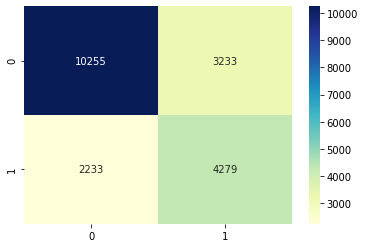

In [55]:
y_prob_gbc1_train = model_gbc1.predict_proba(X5)
y_prob_gbc2_train = model_gbc2.predict_proba(X4)
y_prob_gbc3_train = model_gbc3.predict_proba(X3)
y_prob_gbc4_train = model_gbc4.predict_proba(X2)
y_prob_gbc5_train = model_gbc5.predict_proba(X1)

y_th = (y_prob_gbc5_train[:,1] >= 0.34).astype(np.int64)
get_clf_eval(y1, y_th)

sum_f1_acc(y1, y_th)

In [56]:
optimal_threshold1 = 0.368
optimal_threshold2 = 0.36
optimal_threshold3 = 0.37
optimal_threshold4 = 0.37
optimal_threshold5 = 0.34

y_prob_gbc1 = model_gbc1.predict_proba(df_test)
y_prob_gbc2 = model_gbc2.predict_proba(df_test)
y_prob_gbc3 = model_gbc3.predict_proba(df_test)
y_prob_gbc4 = model_gbc4.predict_proba(df_test)
y_prob_gbc5 = model_gbc5.predict_proba(df_test)

output_gbc1 = (y_prob_gbc1[:,1] >= optimal_threshold1).astype(np.int64)
output_gbc2 = (y_prob_gbc2[:,1] >= optimal_threshold2).astype(np.int64)
output_gbc3 = (y_prob_gbc3[:,1] >= optimal_threshold3).astype(np.int64)
output_gbc4 = (y_prob_gbc4[:,1] >= optimal_threshold4).astype(np.int64)
output_gbc5 = (y_prob_gbc5[:,1] >= optimal_threshold5).astype(np.int64)

threshold_rnd = (optimal_threshold1 + optimal_threshold2 + optimal_threshold3 + 
                    optimal_threshold4 + optimal_threshold5) / 5

print('threshold:', threshold_rnd)

threshold: 0.36160000000000003


In [57]:
# AdaBoostClassifier

model_abc1 = AdaBoostClassifier()
model_abc2 = AdaBoostClassifier()
model_abc3 = AdaBoostClassifier()
model_abc4 = AdaBoostClassifier()
model_abc5 = AdaBoostClassifier()

model_abc1.fit(X_train_1, y_train_1)
model_abc2.fit(X_train_2, y_train_2)
model_abc3.fit(X_train_3, y_train_3)
model_abc4.fit(X_train_4, y_train_4)
model_abc5.fit(X_train_5, y_train_5)

AdaBoostClassifier()


정확도: 0.7376
정밀도: 0.6605
재현율: 0.3600
AUC: 0.6369
F1: 0.4660


0.601807733007733

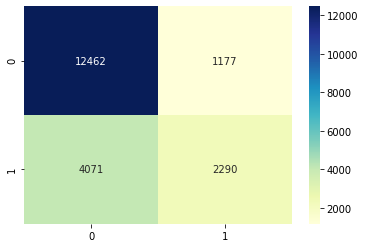

In [58]:
y_prob_abc1_train = model_abc1.predict_proba(X5)
y_prob_abc2_train = model_abc2.predict_proba(X4)
y_prob_abc3_train = model_abc3.predict_proba(X3)
y_prob_abc4_train = model_abc4.predict_proba(X2)
y_prob_abc5_train = model_abc5.predict_proba(X1)

y_th = (y_prob_abc1_train[:,1] >= 0.5).astype(np.int64)
get_clf_eval(y5, y_th)

sum_f1_acc(y5, y_th)

In [59]:
optimal_threshold1 = 0.5
optimal_threshold2 = 0.5
optimal_threshold3 = 0.5
optimal_threshold4 = 0.5
optimal_threshold5 = 0.5

y_prob_abc1 = model_abc1.predict_proba(df_test)
y_prob_abc2 = model_abc2.predict_proba(df_test)
y_prob_abc3 = model_abc3.predict_proba(df_test)
y_prob_abc4 = model_abc4.predict_proba(df_test)
y_prob_abc5 = model_abc5.predict_proba(df_test)

output_abc1 = (y_prob_abc1[:,1] >= optimal_threshold1).astype(np.int64)
output_abc2 = (y_prob_abc2[:,1] >= optimal_threshold2).astype(np.int64)
output_abc3 = (y_prob_abc3[:,1] >= optimal_threshold3).astype(np.int64)
output_abc4 = (y_prob_abc4[:,1] >= optimal_threshold4).astype(np.int64)
output_abc5 = (y_prob_abc5[:,1] >= optimal_threshold5).astype(np.int64)

threshold_rnd = (optimal_threshold1 + optimal_threshold2 + optimal_threshold3 + 
                    optimal_threshold4 + optimal_threshold5) / 5

print('threshold:', threshold_rnd)

threshold: 0.5


In [60]:
# BaggingClassifier

model_bag1 = BaggingClassifier()
model_bag2 = BaggingClassifier()
model_bag3 = BaggingClassifier()
model_bag4 = BaggingClassifier()
model_bag5 = BaggingClassifier()

model_bag1.fit(X_train_1, y_train_1)
model_bag2.fit(X_train_2, y_train_2)
model_bag3.fit(X_train_3, y_train_3)
model_bag4.fit(X_train_4, y_train_4)
model_bag5.fit(X_train_5, y_train_5)

BaggingClassifier()


정확도: 0.7167
정밀도: 0.5770
재현율: 0.5589
AUC: 0.6772
F1: 0.5678


0.6422691023880369

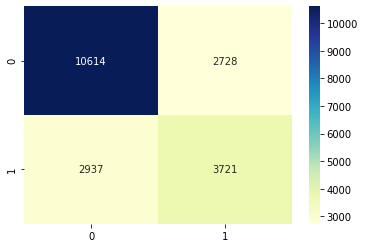

In [61]:
y_prob_bag1_train = model_bag1.predict_proba(X5)
y_prob_bag2_train = model_bag2.predict_proba(X4)
y_prob_bag3_train = model_bag3.predict_proba(X3)
y_prob_bag4_train = model_bag4.predict_proba(X2)
y_prob_bag5_train = model_bag5.predict_proba(X1)

y_th = (y_prob_bag2_train[:,1] >= 0.5).astype(np.int64)
get_clf_eval(y4, y_th)

sum_f1_acc(y4, y_th)

In [62]:
optimal_threshold1 = 0.5
optimal_threshold2 = 0.5
optimal_threshold3 = 0.5
optimal_threshold4 = 0.5
optimal_threshold5 = 0.5

y_prob_bag1 = model_bag1.predict_proba(df_test)
y_prob_bag2 = model_bag2.predict_proba(df_test)
y_prob_bag3 = model_bag3.predict_proba(df_test)
y_prob_bag4 = model_bag4.predict_proba(df_test)
y_prob_bag5 = model_bag5.predict_proba(df_test)

output_bag1 = (y_prob_bag1[:,1] >= optimal_threshold1).astype(np.int64)
output_bag2 = (y_prob_bag2[:,1] >= optimal_threshold2).astype(np.int64)
output_bag3 = (y_prob_bag3[:,1] >= optimal_threshold3).astype(np.int64)
output_bag4 = (y_prob_bag4[:,1] >= optimal_threshold4).astype(np.int64)
output_bag5 = (y_prob_bag5[:,1] >= optimal_threshold5).astype(np.int64)

threshold_rnd = (optimal_threshold1 + optimal_threshold2 + optimal_threshold3 + 
                    optimal_threshold4 + optimal_threshold5) / 5

print('threshold:', threshold_rnd)

threshold: 0.5


In [63]:
result = []
for i in range(len(df_test)):
    if 21 <= (output_xgb1[i] + output_xgb2[i] + output_xgb3[i] + output_xgb4[i] + output_xgb5[i] +
            output_lgbm1[i] + output_lgbm2[i] + output_lgbm3[i] + output_lgbm4[i] + output_lgbm5[i] +
            output_hgb1[i] + output_hgb2[i] + output_hgb3[i] + output_hgb4[i] + output_hgb5[i] +
            output_rnd1[i] + output_rnd2[i] + output_rnd3[i] + output_rnd4[i] + output_rnd5[i] +
            output_cat1[i] + output_cat2[i] + output_cat3[i] + output_cat4[i] + output_cat5[i] +
            output_gbc1[i] + output_gbc2[i] + output_gbc3[i] + output_gbc4[i] + output_gbc5[i] +
            output_bag1[i] + output_bag2[i] + output_bag3[i] + output_bag4[i] + output_bag5[i]):
        result.append(1)
    else:
        result.append(0)

In [64]:
result

[1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [65]:
submit = pd.read_csv('sample_submission.csv')
submit['answer'] = result

submit.to_csv('prediction_file.csv', index=False)